# Traffic Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


## Importing Flow Table

In [2]:
df = pd.read_csv("check3.csv")

In [3]:
df.head()

,N_Packets,N_Bytes,Idle_age,Source,Destination,Switch,Traffic,Controller,Duration,time
0,1,42,18,10.0.0.2,10.0.0.6,1,low,6633,18.459,0.459
1,1,42,23,10.0.0.6,10.0.0.2,1,low,6633,23.477,0.477
2,1,42,18,10.0.0.6,10.0.0.2,1,low,6633,18.463,0.463
3,20,1960,4,10.0.0.2,10.0.0.6,1,high,6633,23.470,19.470
4,20,1960,4,10.0.0.6,10.0.0.2,1,high,6633,23.470,19.470


## Preprocessing

In [4]:
lb_make = LabelEncoder()
df['Source'] = lb_make.fit_transform(df['Source'])
df['Destination'] = lb_make.fit_transform(df['Destination'])
df['Duration'] = lb_make.fit_transform(df['Duration'])
df.loc[df['Traffic']=='low','Traffic'] = 0
df.loc[df['Traffic']=='high','Traffic'] = 1


In [5]:
df.head()


,N_Packets,N_Bytes,Idle_age,Source,Destination,Switch,Traffic,Controller,Duration,time
0,1,42,18,0,7,1,0,6633,187,0.459
1,1,42,23,7,0,1,0,6633,244,0.477
2,1,42,18,7,0,1,0,6633,188,0.463
3,20,1960,4,0,7,1,1,6633,243,19.470
4,20,1960,4,7,0,1,1,6633,243,19.470


## Data Analysis - Initial Traffic on the Controller 

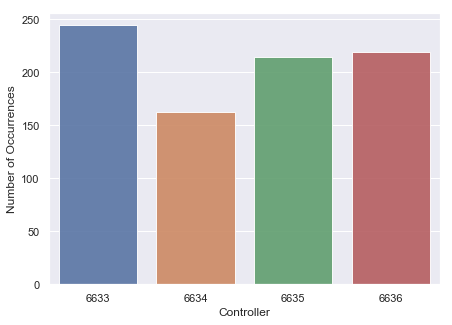

In [6]:
plt.figure(figsize=(7,5))

Controller_count = df['Controller'].value_counts()

sns.set(style="darkgrid")
sns.barplot(Controller_count.index, Controller_count.values, alpha=0.9)

#plt.title('Frequency Distribution of Switch')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Controller', fontsize=12)
plt.show()

## Preparing Input data and spliting into training and testing

In [7]:
X = df.drop(['Traffic'], axis=1)
y =df['Traffic']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

## Applying a sequential  model

In [9]:
model = Sequential()
model.add(Dense(10, activation = "relu", input_shape=(9, )))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, epochs=1500,verbose=1,validation_data=(X_test, y_test),batch_size=40)
score = model.evaluate(X_test, y_test, verbose=0)

Train on 503 samples, validate on 336 samples
Epoch 1/1500
503/503 [==============================] - 2s 3ms/step - loss: 7.6358 - acc: 0.5030 - val_loss: 9.5844 - val_acc: 0.3988
Epoch 2/1500
503/503 [==============================] - 0s 101us/step - loss: 7.9172 - acc: 0.4950 - val_loss: 9.5844 - val_acc: 0.3988
Epoch 3/1500
503/503 [==============================] - 0s 95us/step - loss: 7.7109 - acc: 0.5129 - val_loss: 9.5844 - val_acc: 0.3988
Epoch 4/1500
503/503 [==============================] - 0s 101us/step - loss: 7.6606 - acc: 0.5050 - val_loss: 9.5844 - val_acc: 0.3988
Epoch 5/1500
503/503 [==============================] - 0s 91us/step - loss: 7.8605 - acc: 0.4970 - val_loss: 9.5844 - val_acc: 0.3988
Epoch 6/1500
503/503 [==============================] - 0s 99us/step - loss: 7.6970 - acc: 0.5030 - val_loss: 9.5844 - val_acc: 0.3988
Epoch 7/1500
503/503 [==============================] - 0s 91us/step - loss: 7.7982 - acc: 0.5070 - val_loss: 9.5844 - val_acc: 0.3988
Epoch 8/

Epoch 61/1500
503/503 [==============================] - 0s 95us/step - loss: 5.3817 - acc: 0.6461 - val_loss: 1.0968 - val_acc: 0.9315
Epoch 62/1500
503/503 [==============================] - 0s 93us/step - loss: 5.9633 - acc: 0.6243 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 63/1500
503/503 [==============================] - 0s 91us/step - loss: 5.3779 - acc: 0.6382 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 64/1500
503/503 [==============================] - 0s 89us/step - loss: 5.7652 - acc: 0.6262 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 65/1500
503/503 [==============================] - 0s 97us/step - loss: 5.7952 - acc: 0.6223 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 66/1500
503/503 [==============================] - 0s 87us/step - loss: 5.1089 - acc: 0.6720 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 67/1500
503/503 [==============================] - 0s 93us/step - loss: 6.0814 - acc: 0.5984 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 68/1500
503/503 [=========================

Epoch 121/1500
503/503 [==============================] - 0s 95us/step - loss: 4.4097 - acc: 0.7137 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 122/1500
503/503 [==============================] - 0s 93us/step - loss: 4.4005 - acc: 0.7117 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 123/1500
503/503 [==============================] - 0s 91us/step - loss: 4.2722 - acc: 0.7018 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 124/1500
503/503 [==============================] - 0s 89us/step - loss: 4.1040 - acc: 0.7237 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 125/1500
503/503 [==============================] - 0s 91us/step - loss: 4.3086 - acc: 0.7157 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 126/1500
503/503 [==============================] - 0s 95us/step - loss: 3.9560 - acc: 0.7396 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 127/1500
503/503 [==============================] - 0s 91us/step - loss: 4.4649 - acc: 0.7157 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 128/1500
503/503 [=================

Epoch 181/1500
503/503 [==============================] - 0s 97us/step - loss: 4.2829 - acc: 0.7197 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 182/1500
503/503 [==============================] - 0s 93us/step - loss: 3.7286 - acc: 0.7594 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 183/1500
503/503 [==============================] - 0s 97us/step - loss: 3.7295 - acc: 0.7575 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 184/1500
503/503 [==============================] - 0s 93us/step - loss: 3.4090 - acc: 0.7674 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 185/1500
503/503 [==============================] - 0s 93us/step - loss: 3.4891 - acc: 0.7654 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 186/1500
503/503 [==============================] - 0s 93us/step - loss: 3.2465 - acc: 0.7793 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 187/1500
503/503 [==============================] - 0s 91us/step - loss: 3.7231 - acc: 0.7535 - val_loss: 1.0950 - val_acc: 0.9315
Epoch 188/1500
503/503 [=================

Epoch 241/1500
503/503 [==============================] - 0s 89us/step - loss: 3.3550 - acc: 0.7734 - val_loss: 0.9990 - val_acc: 0.9375
Epoch 242/1500
503/503 [==============================] - 0s 97us/step - loss: 3.2778 - acc: 0.7714 - val_loss: 0.9990 - val_acc: 0.9375
Epoch 243/1500
503/503 [==============================] - 0s 95us/step - loss: 3.7921 - acc: 0.7435 - val_loss: 0.9990 - val_acc: 0.9375
Epoch 244/1500
503/503 [==============================] - 0s 93us/step - loss: 3.5002 - acc: 0.7594 - val_loss: 0.9990 - val_acc: 0.9375
Epoch 245/1500
503/503 [==============================] - 0s 97us/step - loss: 3.1442 - acc: 0.7614 - val_loss: 0.9991 - val_acc: 0.9375
Epoch 246/1500
503/503 [==============================] - 0s 95us/step - loss: 2.9602 - acc: 0.7714 - val_loss: 1.0342 - val_acc: 0.9375
Epoch 247/1500
503/503 [==============================] - 0s 101us/step - loss: 2.5632 - acc: 0.7913 - val_loss: 1.0358 - val_acc: 0.9375
Epoch 248/1500
503/503 [================

503/503 [==============================] - 0s 97us/step - loss: 0.9442 - acc: 0.9006 - val_loss: 0.8439 - val_acc: 0.9375
Epoch 301/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9287 - acc: 0.9006 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 302/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9565 - acc: 0.9006 - val_loss: 0.8456 - val_acc: 0.9375
Epoch 303/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9828 - acc: 0.8946 - val_loss: 0.8440 - val_acc: 0.9375
Epoch 304/1500
503/503 [==============================] - 0s 99us/step - loss: 0.9726 - acc: 0.8946 - val_loss: 0.8447 - val_acc: 0.9375
Epoch 305/1500
503/503 [==============================] - 0s 103us/step - loss: 0.9624 - acc: 0.8986 - val_loss: 0.8448 - val_acc: 0.9375
Epoch 306/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9362 - acc: 0.8986 - val_loss: 0.8448 - val_acc: 0.9375
Epoch 307/1500
503/503 [=============================

Epoch 360/1500
503/503 [==============================] - 0s 99us/step - loss: 0.8563 - acc: 0.9085 - val_loss: 0.8448 - val_acc: 0.9345
Epoch 361/1500
503/503 [==============================] - 0s 97us/step - loss: 0.9576 - acc: 0.9006 - val_loss: 0.8448 - val_acc: 0.9345
Epoch 362/1500
503/503 [==============================] - 0s 97us/step - loss: 0.9352 - acc: 0.8986 - val_loss: 0.8432 - val_acc: 0.9375
Epoch 363/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9246 - acc: 0.9026 - val_loss: 0.8437 - val_acc: 0.9375
Epoch 364/1500
503/503 [==============================] - 0s 97us/step - loss: 0.9147 - acc: 0.8946 - val_loss: 0.8444 - val_acc: 0.9345
Epoch 365/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9583 - acc: 0.9006 - val_loss: 0.8450 - val_acc: 0.9345
Epoch 366/1500
503/503 [==============================] - 0s 89us/step - loss: 0.8714 - acc: 0.9026 - val_loss: 0.8449 - val_acc: 0.9345
Epoch 367/1500
503/503 [=================

Epoch 420/1500
503/503 [==============================] - 0s 91us/step - loss: 0.9782 - acc: 0.8887 - val_loss: 0.8433 - val_acc: 0.9375
Epoch 421/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9207 - acc: 0.9046 - val_loss: 0.8427 - val_acc: 0.9375
Epoch 422/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9523 - acc: 0.9046 - val_loss: 0.8436 - val_acc: 0.9345
Epoch 423/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9559 - acc: 0.9006 - val_loss: 0.8429 - val_acc: 0.9345
Epoch 424/1500
503/503 [==============================] - 0s 97us/step - loss: 0.8911 - acc: 0.9066 - val_loss: 0.8429 - val_acc: 0.9345
Epoch 425/1500
503/503 [==============================] - 0s 147us/step - loss: 0.9619 - acc: 0.8966 - val_loss: 0.8449 - val_acc: 0.9345
Epoch 426/1500
503/503 [==============================] - 0s 120us/step - loss: 0.9883 - acc: 0.9006 - val_loss: 0.8447 - val_acc: 0.9345
Epoch 427/1500
503/503 [===============

Epoch 480/1500
503/503 [==============================] - 0s 99us/step - loss: 0.9544 - acc: 0.9026 - val_loss: 0.8455 - val_acc: 0.9375
Epoch 481/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9826 - acc: 0.8926 - val_loss: 0.8455 - val_acc: 0.9375
Epoch 482/1500
503/503 [==============================] - 0s 89us/step - loss: 0.8719 - acc: 0.9026 - val_loss: 0.8456 - val_acc: 0.9375
Epoch 483/1500
503/503 [==============================] - 0s 91us/step - loss: 0.9309 - acc: 0.9006 - val_loss: 0.8456 - val_acc: 0.9375
Epoch 484/1500
503/503 [==============================] - 0s 91us/step - loss: 0.9297 - acc: 0.9006 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 485/1500
503/503 [==============================] - 0s 93us/step - loss: 0.8989 - acc: 0.9046 - val_loss: 0.8455 - val_acc: 0.9375
Epoch 486/1500
503/503 [==============================] - 0s 91us/step - loss: 0.9313 - acc: 0.9006 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 487/1500
503/503 [=================

Epoch 540/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9257 - acc: 0.9026 - val_loss: 0.8449 - val_acc: 0.9375
Epoch 541/1500
503/503 [==============================] - 0s 109us/step - loss: 0.8719 - acc: 0.9066 - val_loss: 0.8448 - val_acc: 0.9375
Epoch 542/1500
503/503 [==============================] - 0s 91us/step - loss: 0.9343 - acc: 0.8966 - val_loss: 0.8449 - val_acc: 0.9375
Epoch 543/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9342 - acc: 0.8986 - val_loss: 0.8449 - val_acc: 0.9375
Epoch 544/1500
503/503 [==============================] - 0s 95us/step - loss: 0.8904 - acc: 0.9066 - val_loss: 0.8449 - val_acc: 0.9375
Epoch 545/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9661 - acc: 0.8966 - val_loss: 0.8450 - val_acc: 0.9375
Epoch 546/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9169 - acc: 0.8966 - val_loss: 0.8450 - val_acc: 0.9375
Epoch 547/1500
503/503 [================

Epoch 600/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9273 - acc: 0.9026 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 601/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9281 - acc: 0.9006 - val_loss: 0.8453 - val_acc: 0.9375
Epoch 602/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9065 - acc: 0.8986 - val_loss: 0.8453 - val_acc: 0.9375
Epoch 603/1500
503/503 [==============================] - 0s 103us/step - loss: 0.8917 - acc: 0.9066 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 604/1500
503/503 [==============================] - 0s 99us/step - loss: 0.9304 - acc: 0.8986 - val_loss: 0.8455 - val_acc: 0.9375
Epoch 605/1500
503/503 [==============================] - 0s 95us/step - loss: 0.8592 - acc: 0.9085 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 606/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9344 - acc: 0.8986 - val_loss: 0.8453 - val_acc: 0.9375
Epoch 607/1500
503/503 [==============

503/503 [==============================] - 0s 91us/step - loss: 0.9673 - acc: 0.8966 - val_loss: 0.8451 - val_acc: 0.9375
Epoch 660/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9765 - acc: 0.9006 - val_loss: 1.2386 - val_acc: 0.8542
Epoch 661/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9387 - acc: 0.8946 - val_loss: 0.8455 - val_acc: 0.9375
Epoch 662/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9599 - acc: 0.8986 - val_loss: 0.8453 - val_acc: 0.9375
Epoch 663/1500
503/503 [==============================] - 0s 105us/step - loss: 0.8938 - acc: 0.9046 - val_loss: 0.8455 - val_acc: 0.9375
Epoch 664/1500
503/503 [==============================] - 0s 95us/step - loss: 0.8656 - acc: 0.9046 - val_loss: 0.8455 - val_acc: 0.9375
Epoch 665/1500
503/503 [==============================] - 0s 107us/step - loss: 0.9272 - acc: 0.9006 - val_loss: 0.8456 - val_acc: 0.9375
Epoch 666/1500
503/503 [=============================

Epoch 719/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9259 - acc: 0.9046 - val_loss: 0.8445 - val_acc: 0.9375
Epoch 720/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9231 - acc: 0.9046 - val_loss: 0.8446 - val_acc: 0.9375
Epoch 721/1500
503/503 [==============================] - 0s 105us/step - loss: 0.9403 - acc: 0.9006 - val_loss: 0.8449 - val_acc: 0.9375
Epoch 722/1500
503/503 [==============================] - 0s 111us/step - loss: 0.9302 - acc: 0.8986 - val_loss: 0.8451 - val_acc: 0.9375
Epoch 723/1500
503/503 [==============================] - 0s 107us/step - loss: 0.9453 - acc: 0.8926 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 724/1500
503/503 [==============================] - 0s 105us/step - loss: 0.9253 - acc: 0.9026 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 725/1500
503/503 [==============================] - 0s 89us/step - loss: 0.8959 - acc: 0.9046 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 726/1500
503/503 [=============

503/503 [==============================] - 0s 103us/step - loss: 0.9292 - acc: 0.9006 - val_loss: 0.8448 - val_acc: 0.9375
Epoch 779/1500
503/503 [==============================] - 0s 99us/step - loss: 0.8939 - acc: 0.9046 - val_loss: 0.8446 - val_acc: 0.9375
Epoch 780/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9207 - acc: 0.9046 - val_loss: 0.8445 - val_acc: 0.9375
Epoch 781/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9603 - acc: 0.8986 - val_loss: 0.8445 - val_acc: 0.9375
Epoch 782/1500
503/503 [==============================] - 0s 99us/step - loss: 0.8906 - acc: 0.9085 - val_loss: 0.8445 - val_acc: 0.9375
Epoch 783/1500
503/503 [==============================] - 0s 91us/step - loss: 0.9543 - acc: 0.9026 - val_loss: 0.8443 - val_acc: 0.9375
Epoch 784/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9227 - acc: 0.9046 - val_loss: 0.8443 - val_acc: 0.9375
Epoch 785/1500
503/503 [==============================

Epoch 838/1500
503/503 [==============================] - 0s 99us/step - loss: 0.9410 - acc: 0.8926 - val_loss: 0.8451 - val_acc: 0.9375
Epoch 839/1500
503/503 [==============================] - 0s 95us/step - loss: 0.8642 - acc: 0.9046 - val_loss: 0.8452 - val_acc: 0.9375
Epoch 840/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9233 - acc: 0.9046 - val_loss: 0.8449 - val_acc: 0.9375
Epoch 841/1500
503/503 [==============================] - 0s 105us/step - loss: 0.9354 - acc: 0.8986 - val_loss: 0.8450 - val_acc: 0.9375
Epoch 842/1500
503/503 [==============================] - 0s 97us/step - loss: 0.8915 - acc: 0.9066 - val_loss: 0.8447 - val_acc: 0.9375
Epoch 843/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9322 - acc: 0.8986 - val_loss: 0.8449 - val_acc: 0.9375
Epoch 844/1500
503/503 [==============================] - 0s 87us/step - loss: 0.9250 - acc: 0.9026 - val_loss: 0.8448 - val_acc: 0.9375
Epoch 845/1500
503/503 [===============

Epoch 898/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9361 - acc: 0.8946 - val_loss: 0.8449 - val_acc: 0.9375
Epoch 899/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9113 - acc: 0.8986 - val_loss: 0.8453 - val_acc: 0.9375
Epoch 900/1500
503/503 [==============================] - 0s 93us/step - loss: 0.8750 - acc: 0.8986 - val_loss: 0.8451 - val_acc: 0.9375
Epoch 901/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9469 - acc: 0.8926 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 902/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9388 - acc: 0.8966 - val_loss: 0.8455 - val_acc: 0.9375
Epoch 903/1500
503/503 [==============================] - 0s 103us/step - loss: 0.9665 - acc: 0.8926 - val_loss: 0.8458 - val_acc: 0.9375
Epoch 904/1500
503/503 [==============================] - 0s 93us/step - loss: 0.8943 - acc: 0.9046 - val_loss: 0.8457 - val_acc: 0.9375
Epoch 905/1500
503/503 [===============

Epoch 958/1500
503/503 [==============================] - 0s 97us/step - loss: 0.9303 - acc: 0.8986 - val_loss: 0.8443 - val_acc: 0.9375
Epoch 959/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9366 - acc: 0.8946 - val_loss: 0.8445 - val_acc: 0.9375
Epoch 960/1500
503/503 [==============================] - 0s 103us/step - loss: 0.9047 - acc: 0.9006 - val_loss: 0.8439 - val_acc: 0.9375
Epoch 961/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9335 - acc: 0.8966 - val_loss: 0.8434 - val_acc: 0.9375
Epoch 962/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9269 - acc: 0.9006 - val_loss: 0.8434 - val_acc: 0.9375
Epoch 963/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9247 - acc: 0.9026 - val_loss: 0.8435 - val_acc: 0.9375
Epoch 964/1500
503/503 [==============================] - 0s 99us/step - loss: 0.9598 - acc: 0.8986 - val_loss: 0.8435 - val_acc: 0.9375
Epoch 965/1500
503/503 [================

503/503 [==============================] - 0s 93us/step - loss: 0.9704 - acc: 0.8907 - val_loss: 0.8466 - val_acc: 0.9375
Epoch 1018/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9290 - acc: 0.9006 - val_loss: 0.8465 - val_acc: 0.9375
Epoch 1019/1500
503/503 [==============================] - 0s 111us/step - loss: 0.9381 - acc: 0.8946 - val_loss: 0.8464 - val_acc: 0.9375
Epoch 1020/1500
503/503 [==============================] - 0s 99us/step - loss: 0.9189 - acc: 0.8867 - val_loss: 0.8465 - val_acc: 0.9375
Epoch 1021/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9056 - acc: 0.8946 - val_loss: 0.8466 - val_acc: 0.9375
Epoch 1022/1500
503/503 [==============================] - 0s 103us/step - loss: 0.9463 - acc: 0.8926 - val_loss: 0.8467 - val_acc: 0.9375
Epoch 1023/1500
503/503 [==============================] - 0s 99us/step - loss: 0.9291 - acc: 0.9006 - val_loss: 0.8466 - val_acc: 0.9375
Epoch 1024/1500
503/503 [======================

503/503 [==============================] - 0s 99us/step - loss: 0.9262 - acc: 0.9006 - val_loss: 0.8463 - val_acc: 0.9375
Epoch 1077/1500
503/503 [==============================] - 0s 97us/step - loss: 0.9055 - acc: 0.8946 - val_loss: 0.8462 - val_acc: 0.9375
Epoch 1078/1500
503/503 [==============================] - 0s 103us/step - loss: 0.9456 - acc: 0.8887 - val_loss: 0.8462 - val_acc: 0.9375
Epoch 1079/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9312 - acc: 0.8986 - val_loss: 0.8461 - val_acc: 0.9375
Epoch 1080/1500
503/503 [==============================] - 0s 99us/step - loss: 0.9395 - acc: 0.8907 - val_loss: 0.8463 - val_acc: 0.9375
Epoch 1081/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9374 - acc: 0.8926 - val_loss: 0.8462 - val_acc: 0.9375
Epoch 1082/1500
503/503 [==============================] - 0s 91us/step - loss: 0.9286 - acc: 0.8986 - val_loss: 0.8461 - val_acc: 0.9375
Epoch 1083/1500
503/503 [=======================

503/503 [==============================] - 0s 101us/step - loss: 0.9402 - acc: 0.8907 - val_loss: 0.8458 - val_acc: 0.9375
Epoch 1136/1500
503/503 [==============================] - 0s 91us/step - loss: 0.9276 - acc: 0.8986 - val_loss: 0.8457 - val_acc: 0.9375
Epoch 1137/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9023 - acc: 0.8986 - val_loss: 0.8458 - val_acc: 0.9375
Epoch 1138/1500
503/503 [==============================] - 0s 97us/step - loss: 0.9277 - acc: 0.8986 - val_loss: 0.8455 - val_acc: 0.9375
Epoch 1139/1500
503/503 [==============================] - 0s 107us/step - loss: 0.9207 - acc: 0.9046 - val_loss: 0.8455 - val_acc: 0.9375
Epoch 1140/1500
503/503 [==============================] - 0s 93us/step - loss: 0.9003 - acc: 0.9006 - val_loss: 0.8453 - val_acc: 0.9375
Epoch 1141/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9208 - acc: 0.9026 - val_loss: 0.8453 - val_acc: 0.9375
Epoch 1142/1500
503/503 [=======================

503/503 [==============================] - 0s 103us/step - loss: 0.9021 - acc: 0.9006 - val_loss: 0.8477 - val_acc: 0.9375
Epoch 1195/1500
503/503 [==============================] - 0s 107us/step - loss: 1.0535 - acc: 0.8887 - val_loss: 0.8417 - val_acc: 0.9375
Epoch 1196/1500
503/503 [==============================] - 0s 105us/step - loss: 0.9353 - acc: 0.8946 - val_loss: 0.8465 - val_acc: 0.9375
Epoch 1197/1500
503/503 [==============================] - 0s 99us/step - loss: 0.9328 - acc: 0.8946 - val_loss: 0.8454 - val_acc: 0.9375
Epoch 1198/1500
503/503 [==============================] - 0s 99us/step - loss: 0.8980 - acc: 0.9006 - val_loss: 0.8444 - val_acc: 0.9375
Epoch 1199/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9620 - acc: 0.8847 - val_loss: 0.8445 - val_acc: 0.9375
Epoch 1200/1500
503/503 [==============================] - 0s 95us/step - loss: 0.9367 - acc: 0.8926 - val_loss: 0.8489 - val_acc: 0.9345
Epoch 1201/1500
503/503 [======================

503/503 [==============================] - 0s 95us/step - loss: 0.8486 - acc: 0.8390 - val_loss: 0.8437 - val_acc: 0.9375
Epoch 1254/1500
503/503 [==============================] - 0s 95us/step - loss: 0.6361 - acc: 0.8827 - val_loss: 0.8406 - val_acc: 0.9375
Epoch 1255/1500
503/503 [==============================] - 0s 101us/step - loss: 0.9033 - acc: 0.8330 - val_loss: 0.8526 - val_acc: 0.9375
Epoch 1256/1500
503/503 [==============================] - 0s 101us/step - loss: 0.8925 - acc: 0.8489 - val_loss: 0.4839 - val_acc: 0.9375
Epoch 1257/1500
503/503 [==============================] - 0s 99us/step - loss: 0.8511 - acc: 0.8429 - val_loss: 0.3749 - val_acc: 0.9256
Epoch 1258/1500
503/503 [==============================] - 0s 99us/step - loss: 0.7538 - acc: 0.8429 - val_loss: 0.2856 - val_acc: 0.8393
Epoch 1259/1500
503/503 [==============================] - 0s 97us/step - loss: 0.8233 - acc: 0.8052 - val_loss: 0.3427 - val_acc: 0.8244
Epoch 1260/1500
503/503 [=======================

503/503 [==============================] - 0s 101us/step - loss: 0.4561 - acc: 0.9026 - val_loss: 0.3265 - val_acc: 0.9375
Epoch 1313/1500
503/503 [==============================] - 0s 101us/step - loss: 0.4016 - acc: 0.9046 - val_loss: 0.3249 - val_acc: 0.9375
Epoch 1314/1500
503/503 [==============================] - 0s 95us/step - loss: 0.3801 - acc: 0.9085 - val_loss: 0.3232 - val_acc: 0.9375
Epoch 1315/1500
503/503 [==============================] - 0s 95us/step - loss: 0.4192 - acc: 0.9066 - val_loss: 0.3220 - val_acc: 0.9375
Epoch 1316/1500
503/503 [==============================] - 0s 97us/step - loss: 0.4267 - acc: 0.8986 - val_loss: 0.3209 - val_acc: 0.9375
Epoch 1317/1500
503/503 [==============================] - 0s 87us/step - loss: 0.3522 - acc: 0.9046 - val_loss: 0.3196 - val_acc: 0.9375
Epoch 1318/1500
503/503 [==============================] - 0s 95us/step - loss: 0.4365 - acc: 0.9066 - val_loss: 0.3181 - val_acc: 0.9375
Epoch 1319/1500
503/503 [=======================

503/503 [==============================] - 0s 99us/step - loss: 0.3170 - acc: 0.9046 - val_loss: 0.2687 - val_acc: 0.9315
Epoch 1372/1500
503/503 [==============================] - 0s 97us/step - loss: 0.3557 - acc: 0.9026 - val_loss: 0.2687 - val_acc: 0.9315
Epoch 1373/1500
503/503 [==============================] - 0s 95us/step - loss: 0.3517 - acc: 0.9026 - val_loss: 0.2699 - val_acc: 0.9286
Epoch 1374/1500
503/503 [==============================] - 0s 97us/step - loss: 0.3315 - acc: 0.9046 - val_loss: 0.2697 - val_acc: 0.9286
Epoch 1375/1500
503/503 [==============================] - 0s 101us/step - loss: 0.3210 - acc: 0.9046 - val_loss: 0.2712 - val_acc: 0.9256
Epoch 1376/1500
503/503 [==============================] - 0s 99us/step - loss: 0.3042 - acc: 0.9105 - val_loss: 0.2695 - val_acc: 0.9256
Epoch 1377/1500
503/503 [==============================] - 0s 99us/step - loss: 0.2955 - acc: 0.9145 - val_loss: 0.2711 - val_acc: 0.9256
Epoch 1378/1500
503/503 [========================

503/503 [==============================] - 0s 122us/step - loss: 0.3242 - acc: 0.9046 - val_loss: 0.2460 - val_acc: 0.9345
Epoch 1431/1500
503/503 [==============================] - 0s 101us/step - loss: 0.3209 - acc: 0.9085 - val_loss: 0.2437 - val_acc: 0.9375
Epoch 1432/1500
503/503 [==============================] - 0s 93us/step - loss: 0.3460 - acc: 0.9026 - val_loss: 0.2434 - val_acc: 0.9375
Epoch 1433/1500
503/503 [==============================] - 0s 99us/step - loss: 0.3550 - acc: 0.9006 - val_loss: 0.2434 - val_acc: 0.9375
Epoch 1434/1500
503/503 [==============================] - 0s 99us/step - loss: 0.3123 - acc: 0.9066 - val_loss: 0.2437 - val_acc: 0.9375
Epoch 1435/1500
503/503 [==============================] - 0s 97us/step - loss: 0.3344 - acc: 0.9066 - val_loss: 0.2440 - val_acc: 0.9375
Epoch 1436/1500
503/503 [==============================] - 0s 99us/step - loss: 0.3426 - acc: 0.9046 - val_loss: 0.2440 - val_acc: 0.9375
Epoch 1437/1500
503/503 [=======================

503/503 [==============================] - 0s 101us/step - loss: 0.3073 - acc: 0.9066 - val_loss: 0.2427 - val_acc: 0.9375
Epoch 1490/1500
503/503 [==============================] - 0s 99us/step - loss: 0.3100 - acc: 0.9046 - val_loss: 0.2420 - val_acc: 0.9375
Epoch 1491/1500
503/503 [==============================] - 0s 105us/step - loss: 0.3446 - acc: 0.9026 - val_loss: 0.2421 - val_acc: 0.9375
Epoch 1492/1500
503/503 [==============================] - 0s 99us/step - loss: 0.3355 - acc: 0.9006 - val_loss: 0.2421 - val_acc: 0.9375
Epoch 1493/1500
503/503 [==============================] - 0s 97us/step - loss: 0.3824 - acc: 0.8966 - val_loss: 0.2421 - val_acc: 0.9375
Epoch 1494/1500
503/503 [==============================] - 0s 95us/step - loss: 0.3063 - acc: 0.9066 - val_loss: 0.2418 - val_acc: 0.9375
Epoch 1495/1500
503/503 [==============================] - 0s 89us/step - loss: 0.3074 - acc: 0.9066 - val_loss: 0.2414 - val_acc: 0.9375
Epoch 1496/1500
503/503 [=======================

## Test loss and accuracy

In [16]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24098111334301175
Test accuracy: 0.9375


## Plotting graphs - loss and accuracy

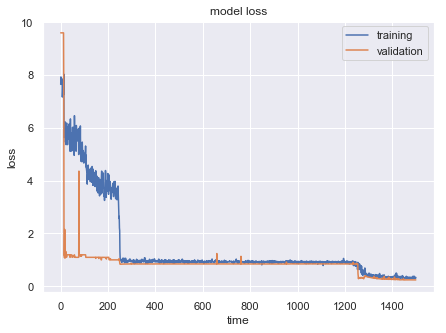

In [11]:
plt.figure(figsize=(7,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

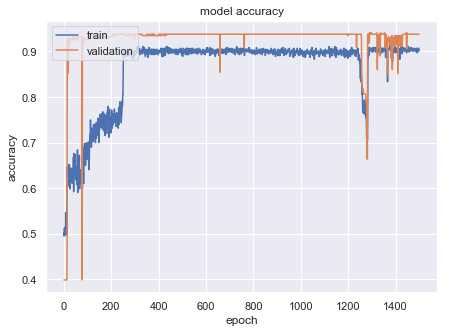

In [12]:
plt.figure(figsize=(7,5))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Future Traffic Prediction - load on the controller

In [13]:
prediction = model.predict_classes(X_test)

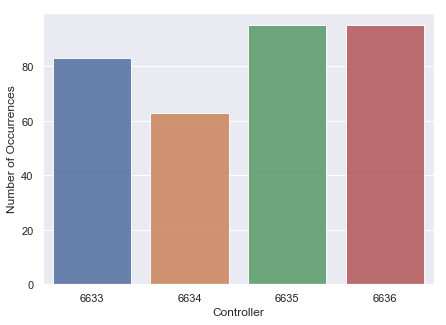

In [14]:
plt.figure(figsize=(7,5))

Controller_count = pd.DataFrame(list(zip(X_test['Controller'],prediction[:,0])))[0].value_counts()
sns.set(style="darkgrid")
sns.barplot(Controller_count.index, Controller_count.values, alpha=0.9)

#plt.title('Frequency Distribution of Switch')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Controller', fontsize=12)
plt.show()

## Confusion Matrix 0 - low 1 - high

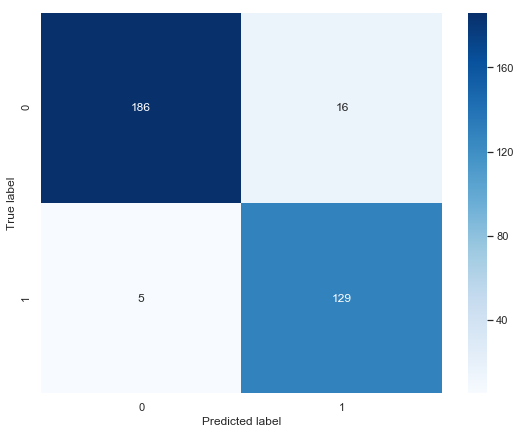

In [15]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt='d',cmap="Blues") 
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()